##Постановка задачи

Рассматривается дифференциальное уравнение третьего порядка: $𝑢^{(3)}+8𝑢=f(𝑥)$,
с граничными условиями:
$𝑢(0)=𝑢'(0)=0,\quad
𝑢(1)=\alpha$
.

Необходимо построить разностную схему второго порядка аппроксимации и решить уравнение при различных значениях
$h$ (шаг сетки) и $\alpha$.

## Физическая интерпретация

Это уравнение может описывать **изгиб упругой балки** под действием нагрузки. В случае, если балка находится под действием равномерного распределённого или сосредоточенного усилия, ее изгиб может описываться уравнением подобного вида, где:
-  $u(x)$  — это функция прогиба балки в зависимости от положения  x  вдоль её длины.
- Член  $8u$  может представлять линейный отклик балки на приложенное усилие, связанный с упругими силами.
- Правая часть  $f(x)$  описывает внешнюю силу или нагрузку, приложенную к балке.

В этом случае, уравнение третьего порядка может возникать, например, при учёте вязких или диссипативных сил в системе, или в системах, где распределение силы и деформации связано через сложные зависимости.

### Граничные условия
- $u(0) = 0$  и  $u'(0) = 0$ : эти условия часто соответствуют закреплению одного конца балки (зафиксированное положение и нулевая скорость изменения прогиба).
-  $u(1) = \alpha$ : условие на другом конце балки — это может быть либо заданное смещение конца балки, либо положение под нагрузкой.


### Третья производная и её физический смысл

#### В теории упругости и изгиба балки:

1. **Первая производная  $u'(x)$**: Это наклон балки в точке  $x$ , который определяет угол наклона балки в этой точке.

2. **Вторая производная  $u''(x)$**: Это кривизна балки в точке  $x$ , которая связана с изменением угла наклона и, соответственно, с изгибающим моментом.

3. **Третья производная  $u^{(3)}(x)$**: Эта величина описывает изменение кривизны балки. Она определяет, как кривизна меняется вдоль балки. В общем случае, это связано с изменением распределения изгибающих моментов вдоль балки и может быть связана с более сложными аспектами механики упругих деформаций, такими как дополнительные силы или эффекты, влияющие на изменение кривизны.


Для получения разностной аппроксимации производных второго и третьего порядков в задаче с уравнением $ u^{(3)}(x) + 8u(x) = f(x) $ с шагом сетки $ h $, используются стандартные схемы конечных разностей. Здесь представлена аппроксимация для второй и третьей производных с **вторым порядком точности**.

### 1. Разностная аппроксимация первой производной $ u'(x) $

Используем центральную разностную аппроксимацию для первой производной $ u'(x) $:  
$
u'(x_i) \approx \frac{u_{i+1} - u_{i}}{h} + O(h^2).
$

Где $ u_i = u(x_i) $ — значение функции в узле $ x_i = i \cdot h $, а $ h $ — шаг сетки.

### 2. Разностная аппроксимация второй производной $ u''(x) $

Вторая производная $ u''(x) $ аппроксимируется центральной разностной схемой:
$
u''(x_i) \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} + O(h^2).
$

Эта схема также обладает вторым порядком точности.

### 3. Разностная аппроксимация третьей производной $ u^{(3)}(x) $

Для третьей производной $ u^{(3)}(x) $ применим центральную разностную схему второго порядка:
$
u^{(3)}(x_i) \approx \frac{u_{i+2} - 2u_{i+1} + 2u_{i-1} - u_{i-2}}{2h^3} + O(h^2).
$
Эта схема аппроксимирует третью производную с **вторым порядком точности**.

### 4. Подстановка в уравнение

Подставим эти аппроксимации в исходное уравнение $ u^{(3)}(x) + 8u(x) = f(x) $ в узле $x_i $:
$
\frac{u_{i+2} - 2u_{i+1} + 2u_{i-1} - u_{i-2}}{2h^3} + 8u_i = f_i.
$

Где $ f_i = f(x_i) $.

### 5. Граничные условия

Граничные условия $ u(0) = u'(0) = 0 $ и $ u(1) = \alpha $ задаются явно:
- $ u_0 = 0 $,
- $ \frac{u_1 - u_{0}}{h} = 0 $ (приближенное граничное условие для первой производной в точке $ x = 0 $),
- $ u_{N+1} = \alpha $, где $ N+1 $ — индекс последнего узла сетки (соответствующего $ x = 1 $).

### 6. Составление системы линейных алгебраических уравнений (СЛАУ)

После дискретизации дифференциального уравнения и применения граничных условий, получаем систему линейных уравнений на значения функции $ u_i $ в узлах сетки. Эта система записывается в виде матричного уравнения:
$
A \mathbf{u} = \mathbf{f},
$
где:
- $ A $ — матрица, состоящая из коэффициентов разностной аппроксимации,
- $ \mathbf{u} $ — вектор значений функции $ u_i $,
- $ \mathbf{f} $ — вектор значений правой части $ f_i $.

Неизвестными у нас будут значения $u$ во внутренних узлах интерполяции: $u_1,...,u_N$

Из условий $u'(0) = 0$ и $u(0)=0$ получим: $0=\frac{u_{1} - u_{0}}{h}$, а значит $u_1=0$

Для вычисления третьей производной в точке $x_1$ нам понадобится ввести вспомогательную переменную $u_{-1}$. Воспользуемся приближением $u_{-1} = u(-\frac{1}{h})≈ u(0)-u'(0)h=0$

Получим систему из $N-1$ линейных уравнений для оставшихся $N-1$ неизвестных $u_2,...,u_N$
$\begin{cases}
  -\frac{1}{h^3}u_{2}+\frac{1}{2h^3}u_{3} = f_1 \\
  8u_2-\frac{1}{h^3}u_{3}+\frac{1}{2h^3}u_{4} = f_2 \\
  -\frac{1}{2h^3}u_{i-2} + \frac{1}{h^3}u_{i-1}+8u_i-\frac{1}{h^3}u_{i+1}+\frac{1}{2h^3}u_{i+2} = f_i &\text{,   $i=3,...,N-2$} \\
  -\frac{1}{2h^3}u_{N-3} + \frac{1}{h^3}u_{N-2}+8u_{N-1}-\frac{1}{h^3}u_{N}+\frac{1}{2h^3}\alpha = f_{N-1}
\end{cases}$

### Итог:

Получив систему уравнений, её можно решить численно, используя стандартные методы решения систем линейных уравнений


In [91]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [92]:
N = 1000 # Число промежуточных узлов интерполяции
h = 1/(N+1)
x = np.linspace(0, 1, N+2)
alpha = 1

In [93]:
def zero(x): #константа 0
    return np.zeros_like(x)
def exp(x): # e^x
    return np.exp(x)
def exp3(x): # e^(3x)
    return np.exp(3*x)
def xexp(x): # x*e^x
    return np.exp(x)*x
def sin_plus_cos(x): # sin(x)+cos(x)
    return np.sin(x)+np.cos(x)

Для проверки будем использовать следующие функции:
- $f_1(x) \equiv 0$
- $f_2(x)=e^x$
- $f_3(x)=xe^x$
- $f_4(x)=\sin{x}+\cos{x}$

Решение однородного уравнения имеет вид $u_{oo}(x)=C_1e^{-2x}+e^{x}(C_2\cos{\sqrt{3}x}+C_2\sin{\sqrt{3}x}), \quad C_i\in\mathbb{R}, \quad i=1,2,3$

In [94]:
def homog_sol(x, C): # решение однородного уравнения
    return C[0]*np.exp(-2*x) + np.exp(x)*(C[1]*np.cos(3**0.5*x) + C[2]*np.sin(3**0.5*x))

In [95]:
def matrix(N, alpha):
    A = np.zeros((N-1, N-1))
    for i in range(N-1):
        for j in range(i-3, i+2):
            if ((j < 0) or (j > N-2)):
                continue
            if i == j:
                A[i][j] = -1/h**3
            if j == (i-1):
                A[i][j] = 8
            if j == (i-2):
                A[i][j] = 1/h**3
            if j == (i-3):
                A[i][j] = -1/(2*h**3)
            if j == (i+1):
                A[i][j] = 1/(2*h**3)
    return A

In [96]:
def rhs(N, alpha, f):
    x = np.linspace(0, 1, N+2)
    b = f(x)[1:N]
    b[N-2] -= alpha/(2*h**3)
    return b

In [97]:
def approx(N, alpha, f):
    u = np.linalg.solve(matrix(N, alpha), rhs(N, alpha, f))
    u_01 = np.array([0, 0])
    u_last = np.array([alpha])
    return np.concatenate((u_01, u, u_last))

In [98]:
def sol1(x, alpha): # точное решение при правой части f_1
    a = np.array([[1, 1, 0], [-2, 1, 3**0.5], [np.exp(-2), np.cos(3**0.5)*np.e, np.sin(3**0.5)*np.e]])
    r = np.array([0, 0, alpha])
    C = np.linalg.solve(a, r)
    return homog_sol(x, C)

In [99]:
def sol2(x, alpha): #точное решение при правой части f_2
    a = np.array([[1, 1, 0], [-2, 1, 3**0.5], [np.exp(-2), np.exp(1)*np.cos(3**0.5), np.exp(1)*np.sin(3**0.5)]])
    r = np.array([-1/9, -1/9, (-1/9)*np.e+alpha])
    C = np.linalg.solve(a, r)
    return homog_sol(x, C) + 1/9*np.exp(x)

In [100]:
def sol3(x, alpha): #точное решение при правой части f_4
    a = np.array([[1, 1, 0], [-2, 1, 3**0.5], [np.exp(-2), np.exp(1)*np.cos(3**0.5), np.exp(1)*np.sin(3**0.5)]])
    r = np.array([1/27, -2/27, alpha - 2*np.e/27])
    C = np.linalg.solve(a, r)
    return homog_sol(x, C) + 1/9*(x-1/3)*np.exp(x)

In [101]:
def sol4(x, alpha): #точное решение при правой части f_5
    a = np.array([[1, 1, 0], [-2, 1, 3**0.5], [np.exp(-2), np.exp(1)*np.cos(3**0.5), np.exp(1)*np.sin(3**0.5)]])
    r = np.array([-9/65, -7/65, alpha - (7*np.sin(1) + 9*np.cos(1))/65])
    C = np.linalg.solve(a, r)
    return homog_sol(x, C) +1/65*(7*np.sin(x)+9*np.cos(x))

#### Графики аппроксимации и точного решения при правой части $f_1\equiv0$ и разных $\alpha$ и $h$

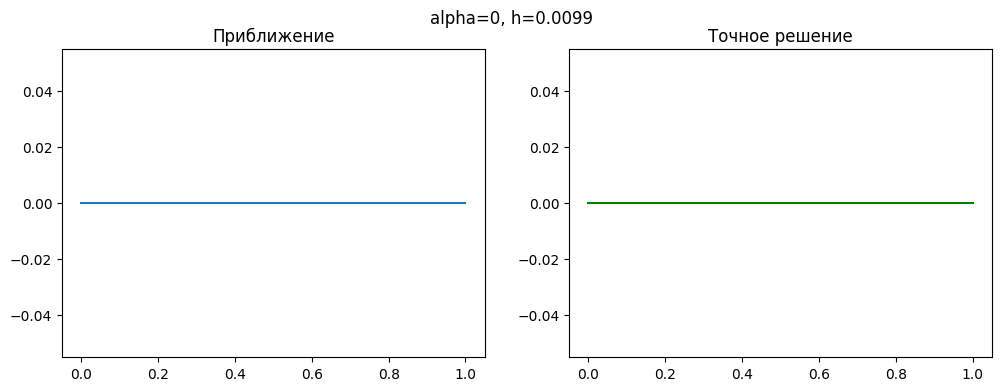

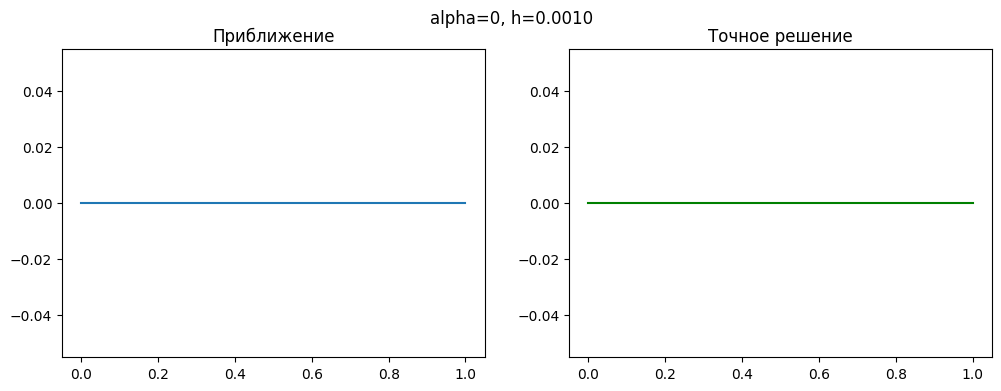

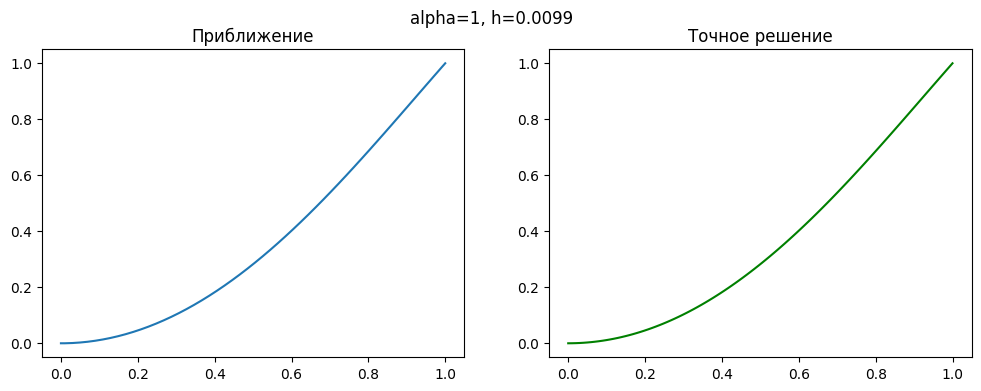

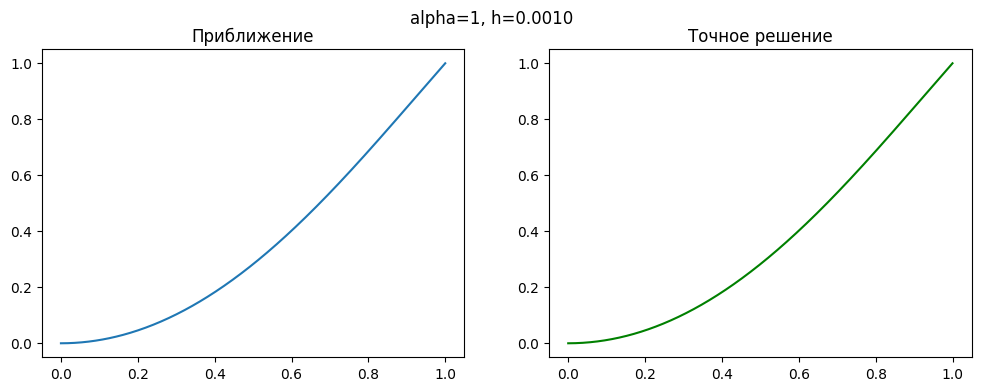

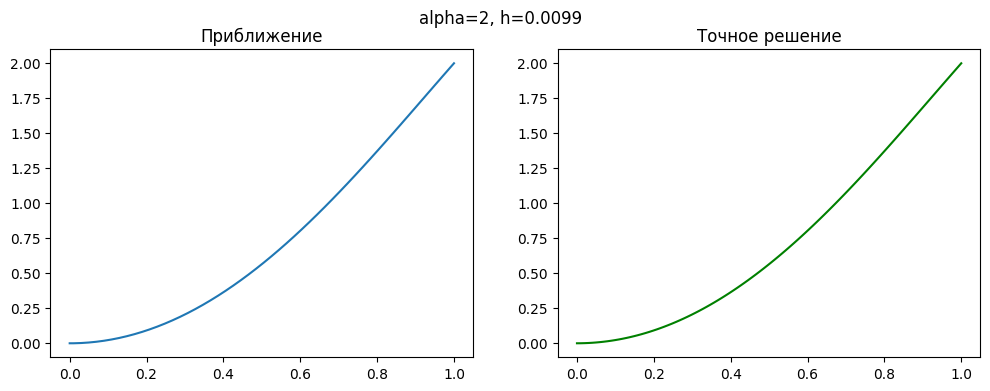

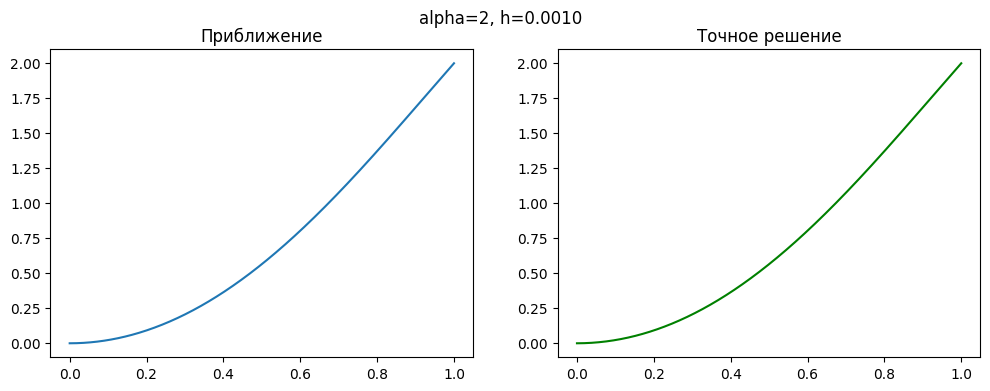

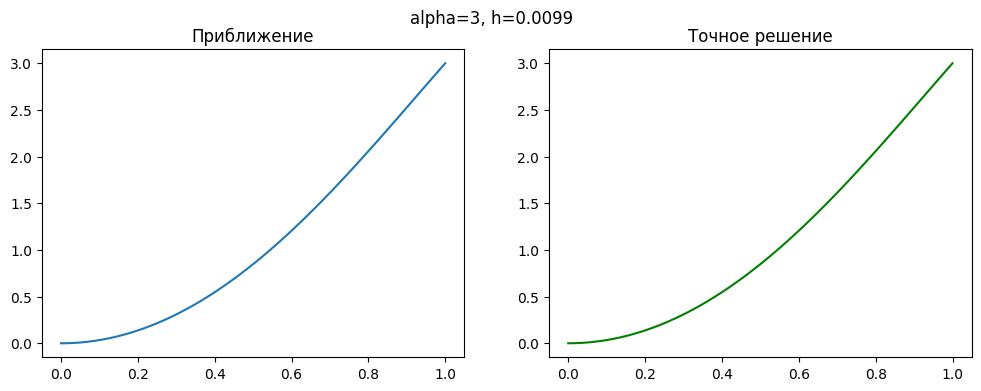

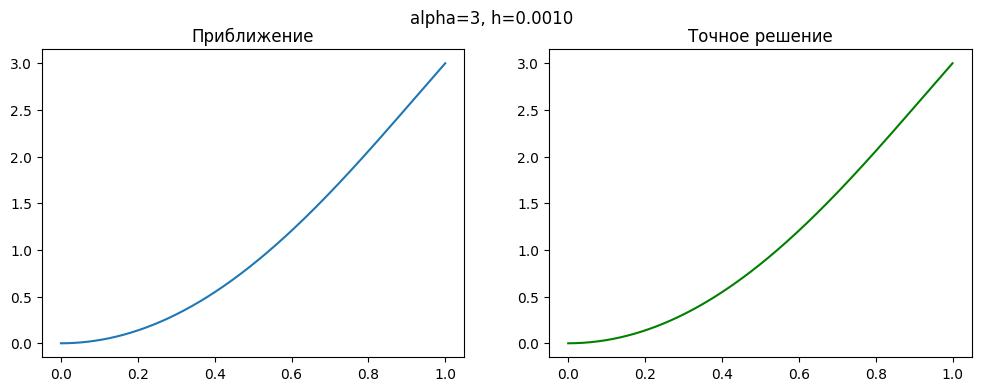

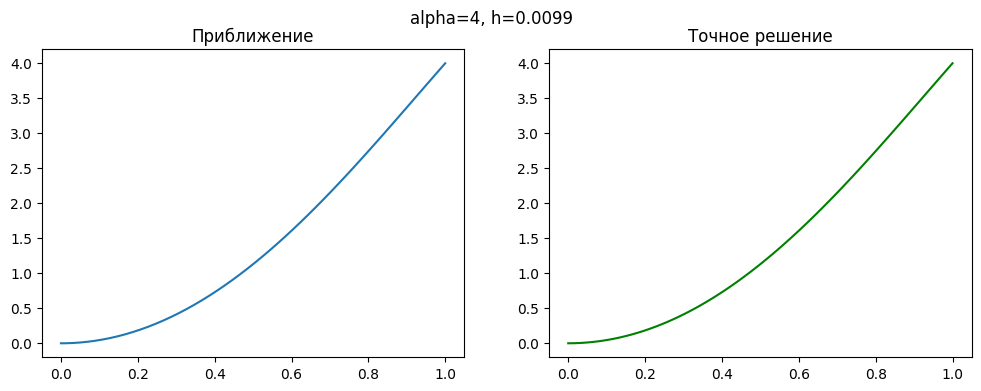

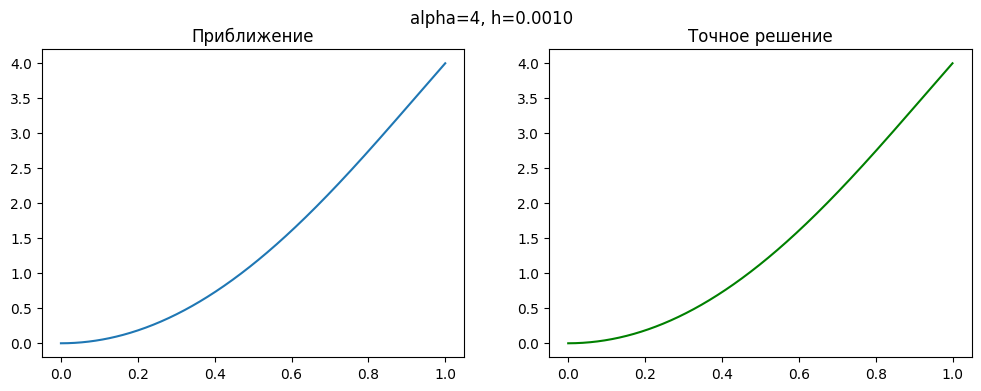

In [118]:
for alpha in range(5):
    for N in (100, 1000):
        h = 1/(N+1)
        x = np.linspace(0, 1, N+2)
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.suptitle(f"alpha={alpha}, h={h:.4f}")
        plt.plot(x, approx(N, alpha, zero))
        plt.title("Приближение")
        plt.subplot(1, 2, 2)
        plt.plot(x, sol1(x, alpha), color='green')
        plt.title("Точное решение")
        plt.show()

#### Графики аппроксимации и точного решения при правой части $f_2=e^x$ и разных $\alpha$ и $h$


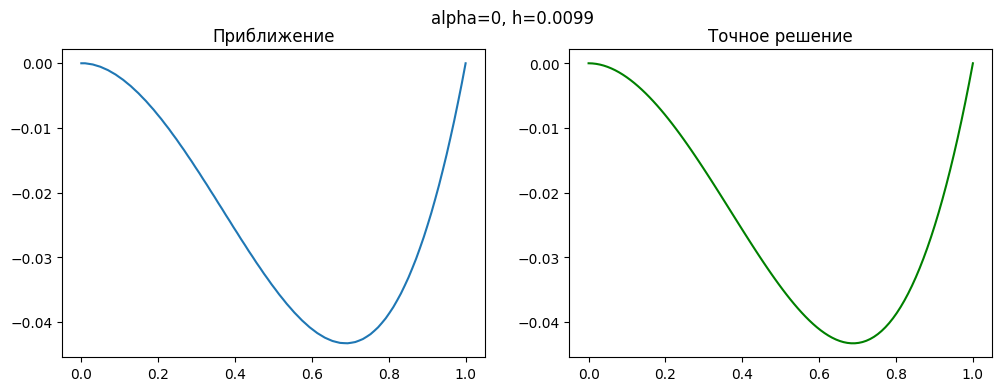

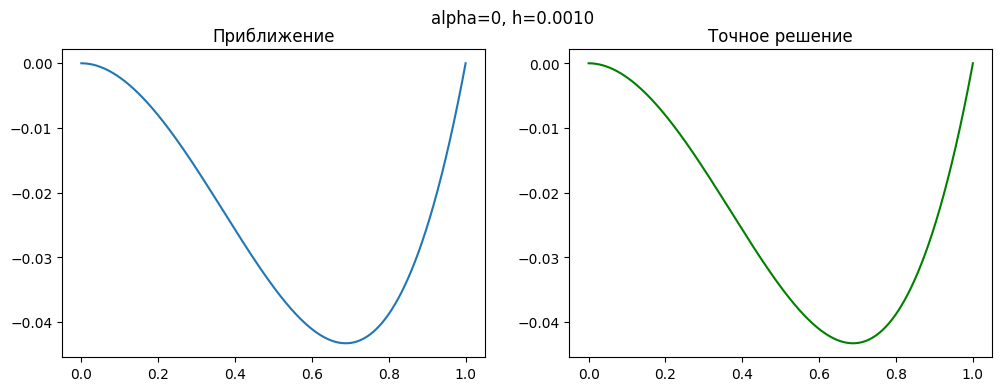

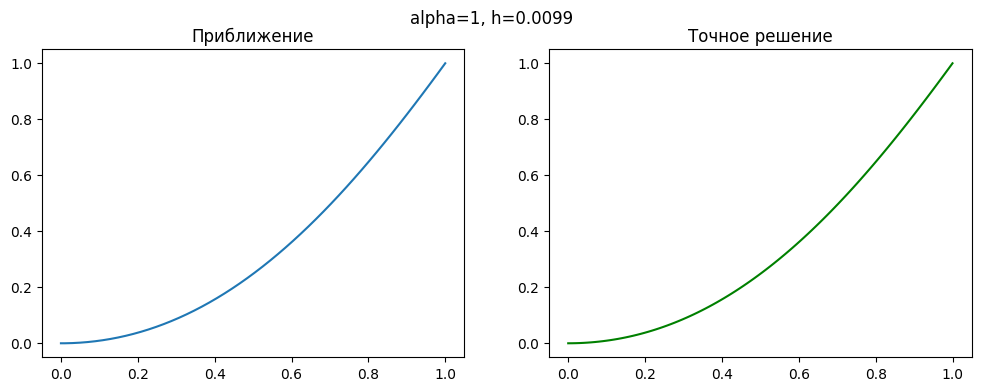

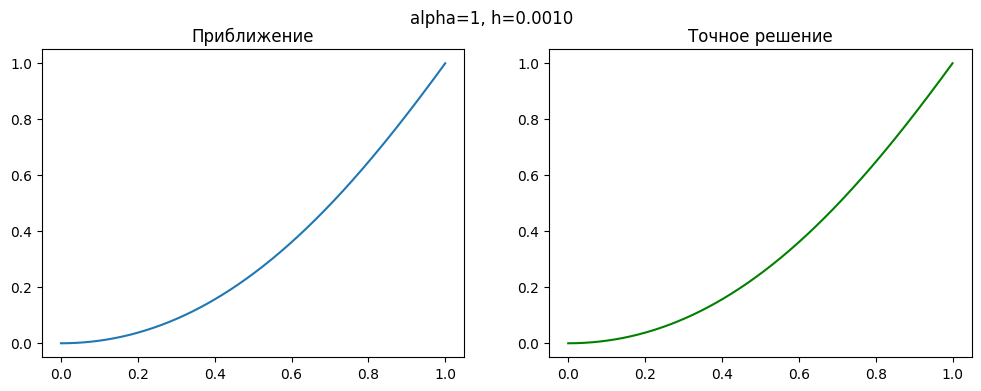

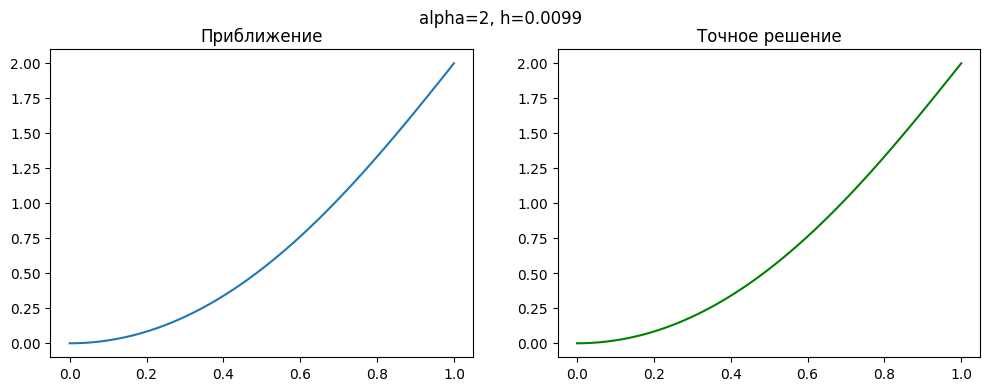

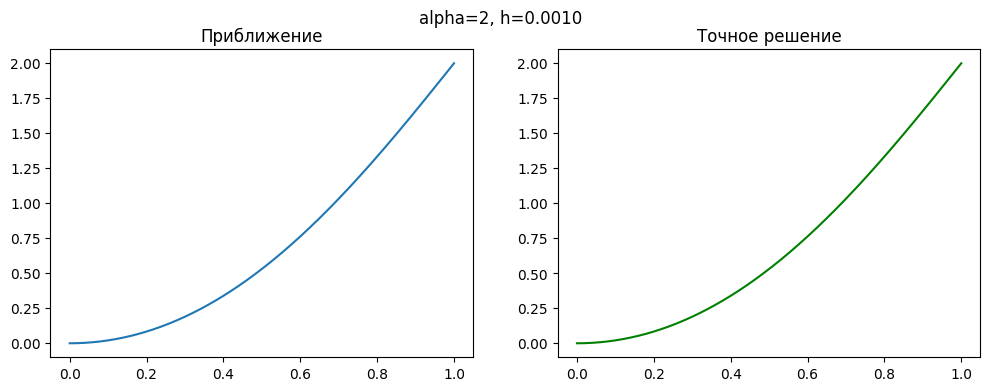

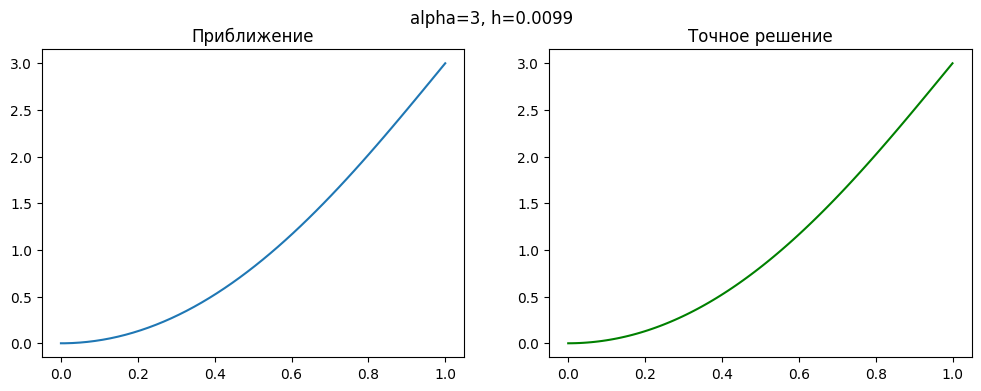

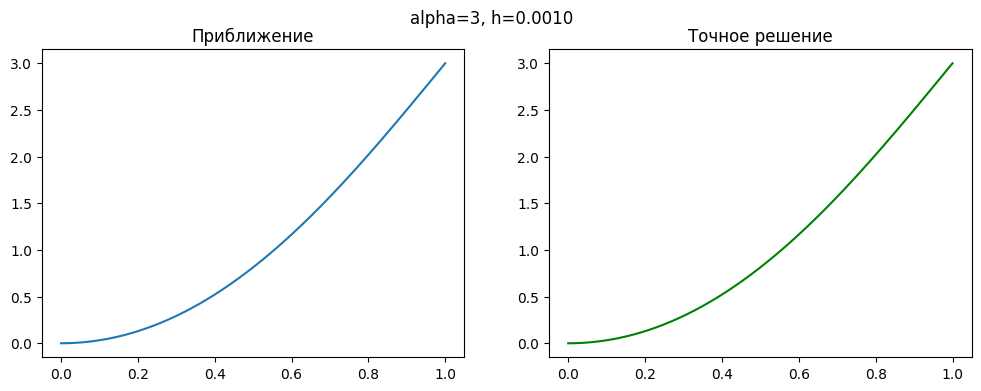

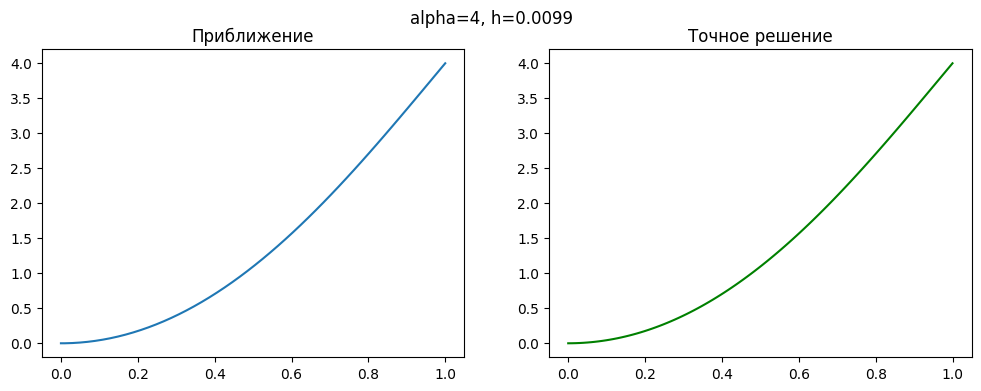

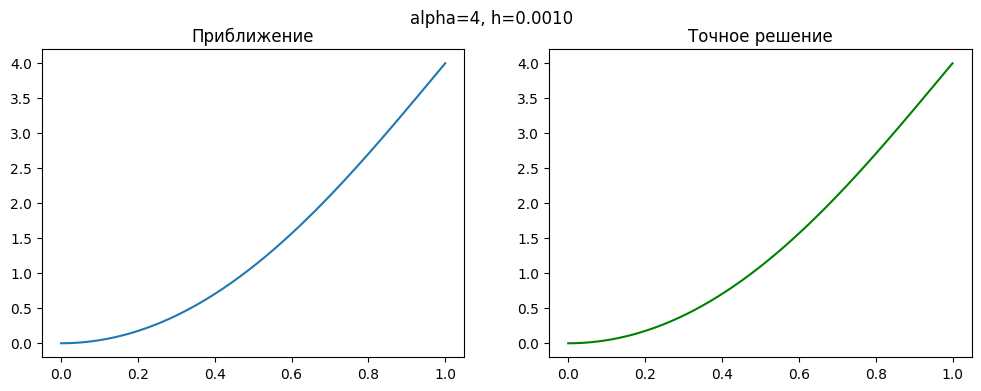

In [117]:
for alpha in range(5):
    for N in (100, 1000):
        h = 1/(N+1)
        x = np.linspace(0, 1, N+2)
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.suptitle(f"alpha={alpha}, h={h:.4f}")
        plt.plot(x, approx(N, alpha, np.exp))
        plt.title("Приближение")
        plt.subplot(1, 2, 2)
        plt.plot(x, sol2(x, alpha), color='green')
        plt.title("Точное решение")
        plt.show()

#### Графики аппроксимации и точного решения при правой части $f_3=xe^{x}$ и разных $\alpha$ и $h$

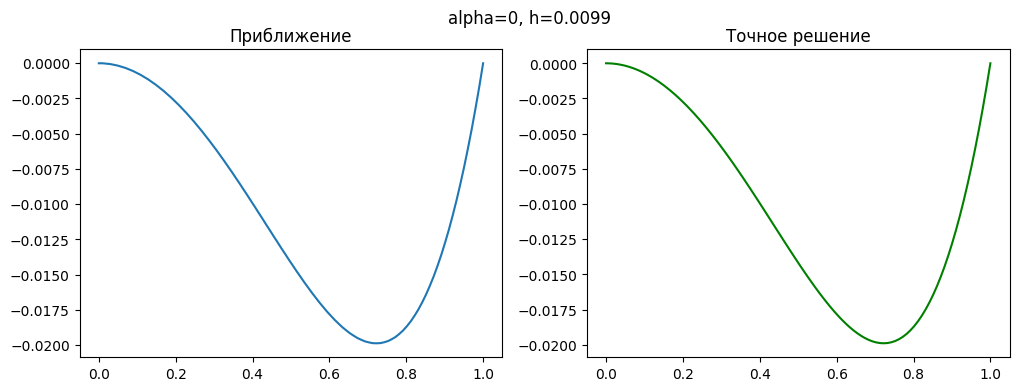

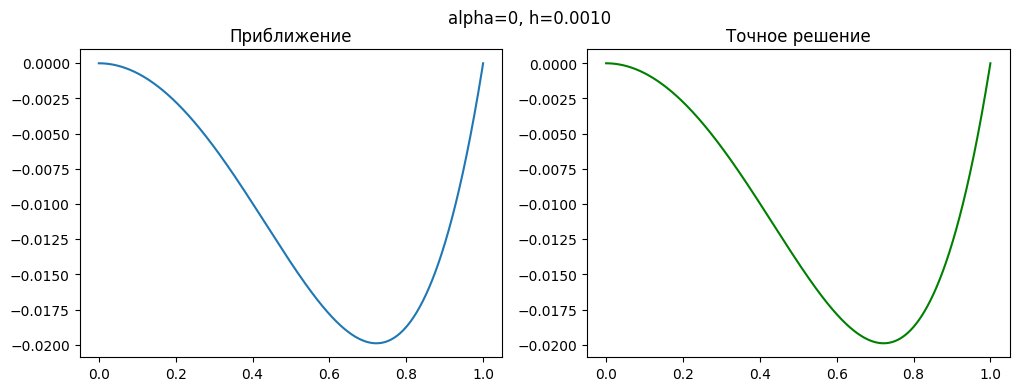

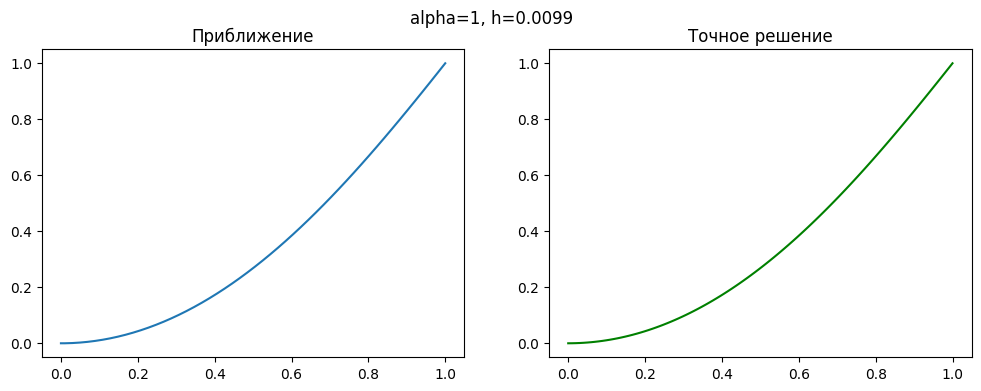

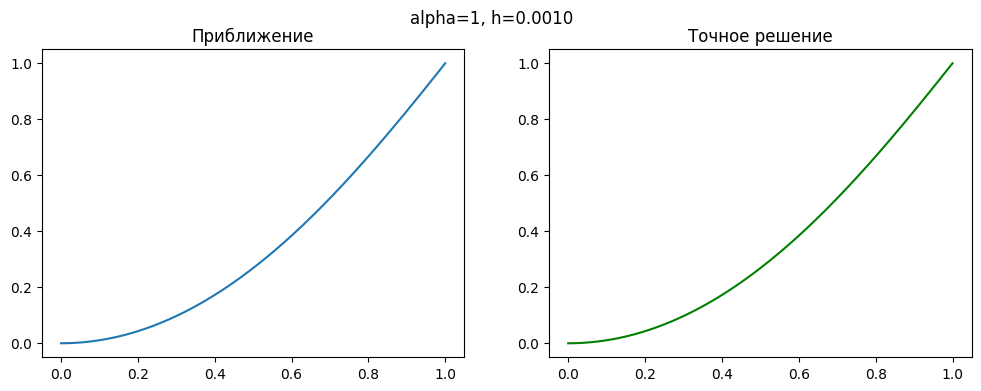

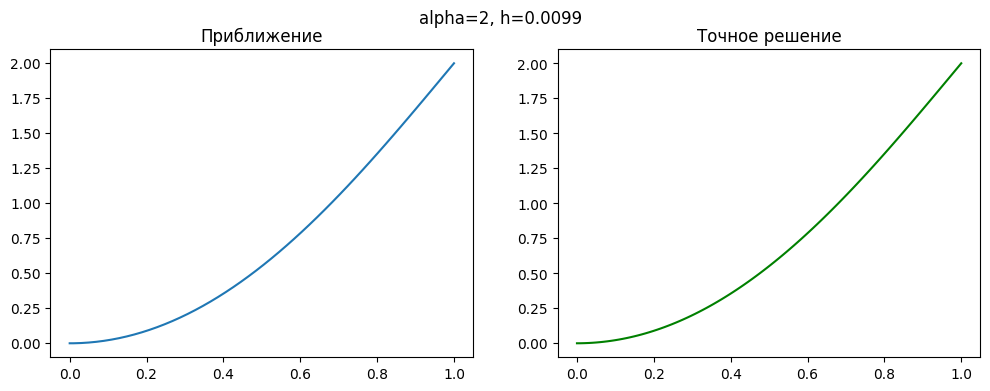

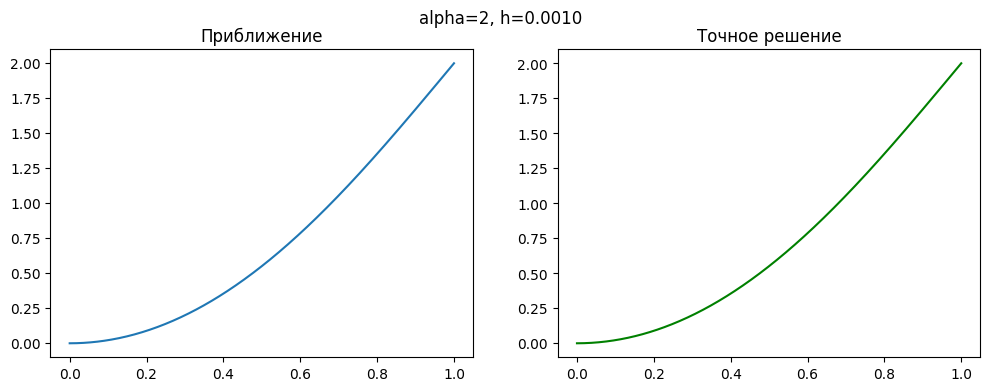

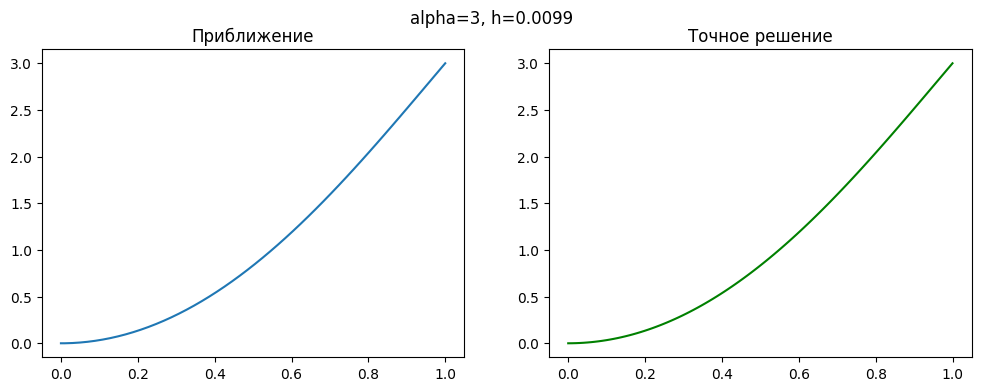

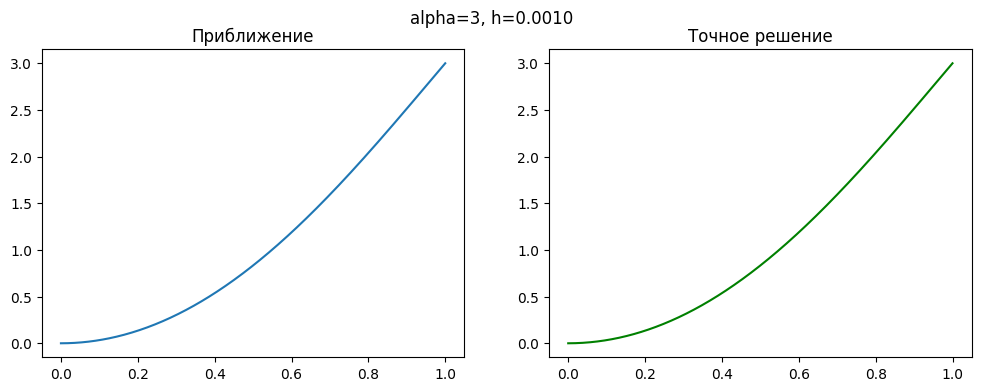

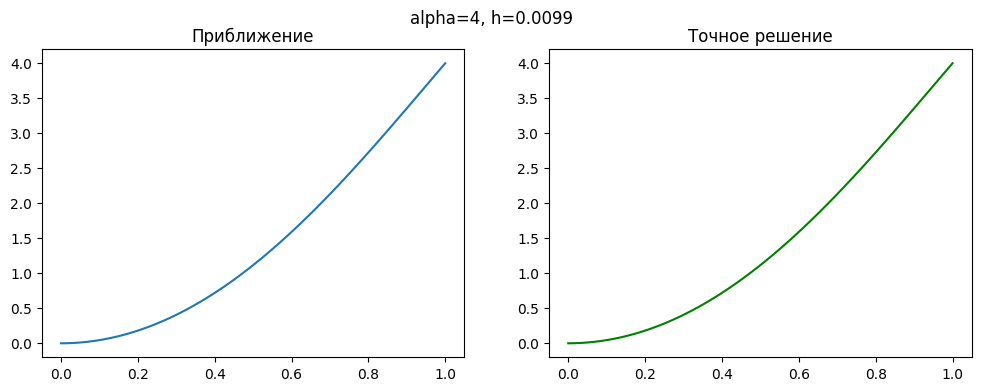

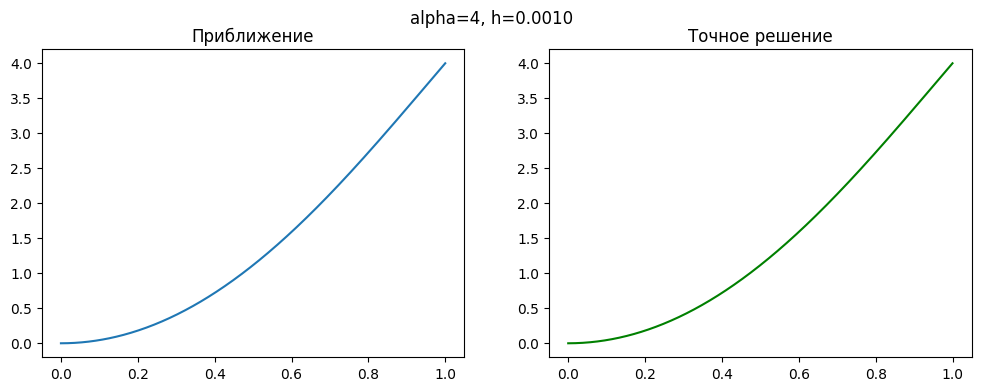

In [116]:
for alpha in range(5):
    for N in (100, 1000):
        h = 1/(N+1)
        x = np.linspace(0, 1, N+2)
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.suptitle(f"alpha={alpha}, h={h:.4f}")
        plt.plot(x, approx(N, alpha, xexp))
        plt.title("Приближение")
        plt.subplot(1, 2, 2)
        plt.plot(x, sol3(x, alpha), color='green')
        plt.title("Точное решение")
        plt.show()

#### Графики аппроксимации и точного решения при правой части $f_4=\sin{x}+\cos{x}$ и разных $\alpha$ и $h$

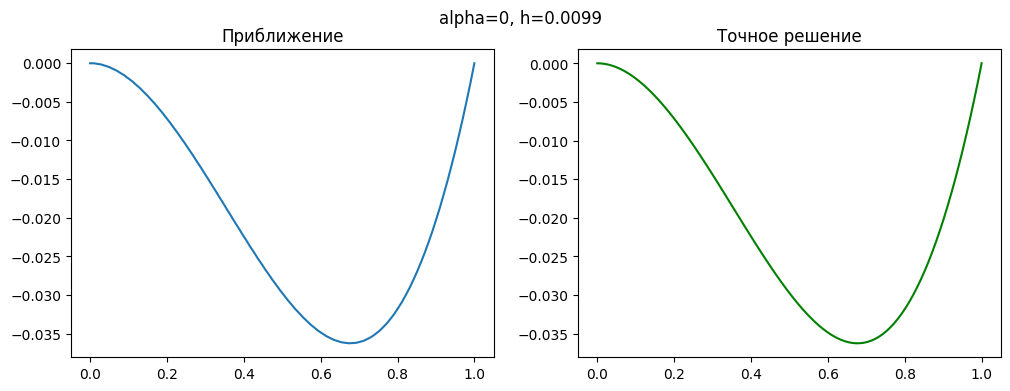

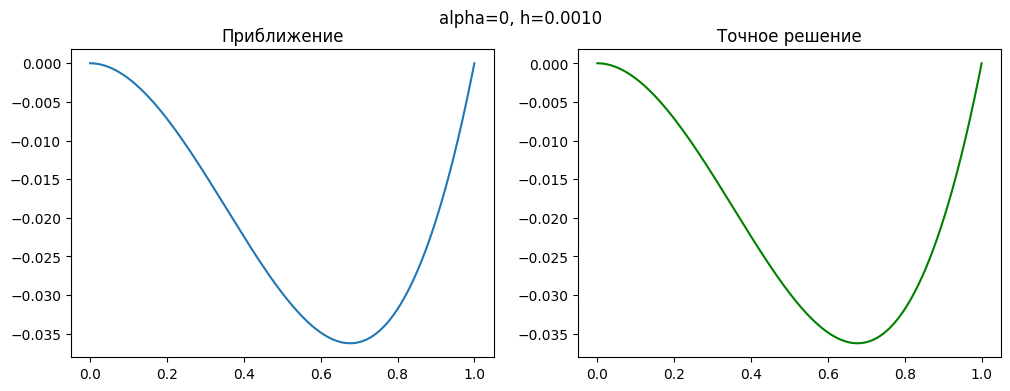

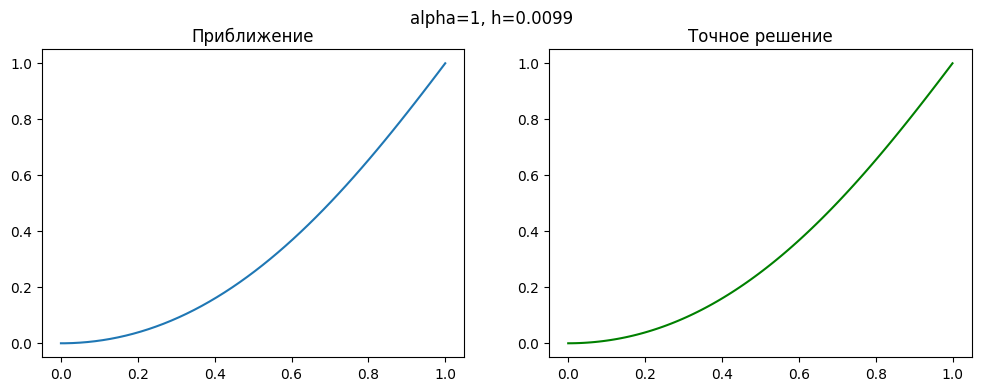

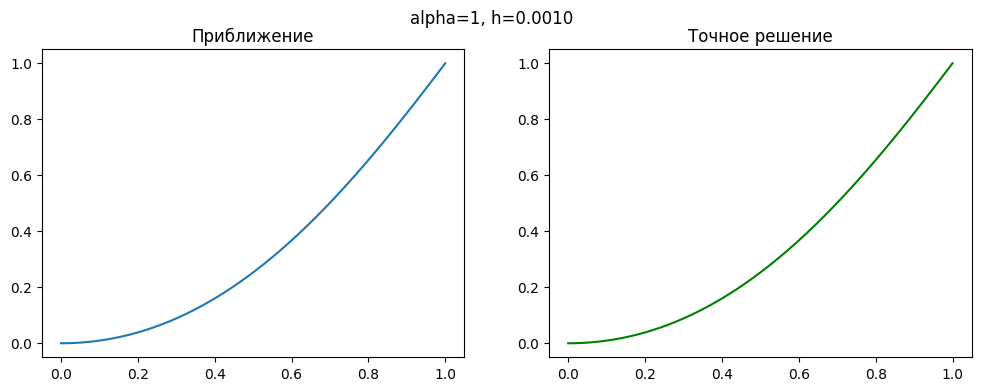

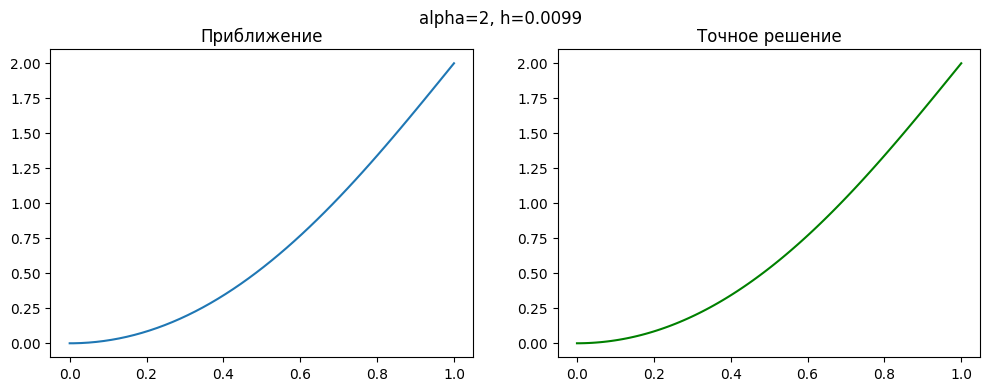

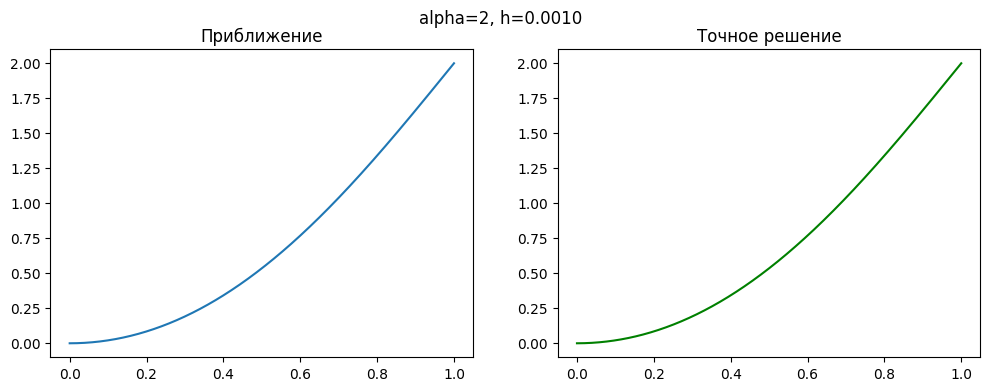

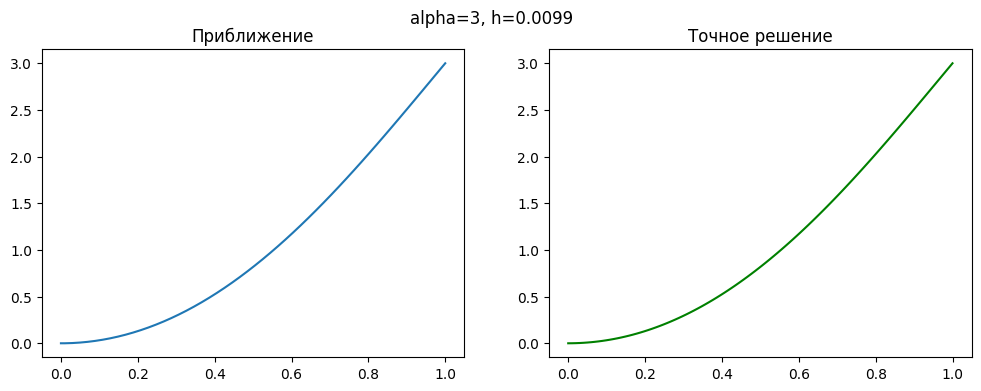

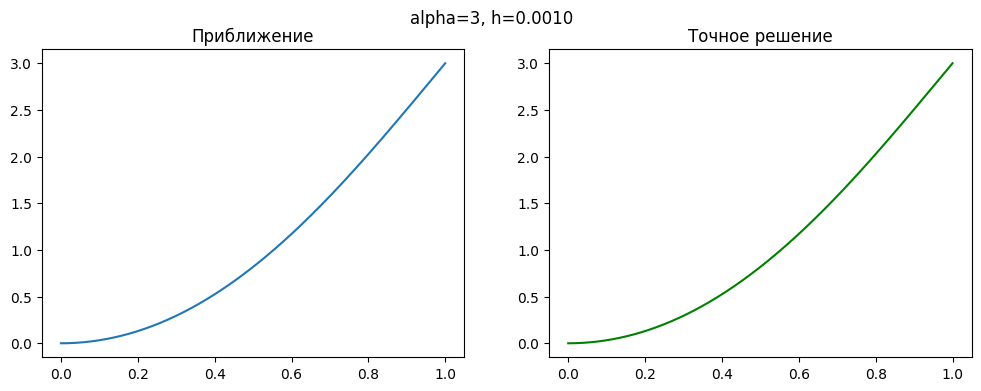

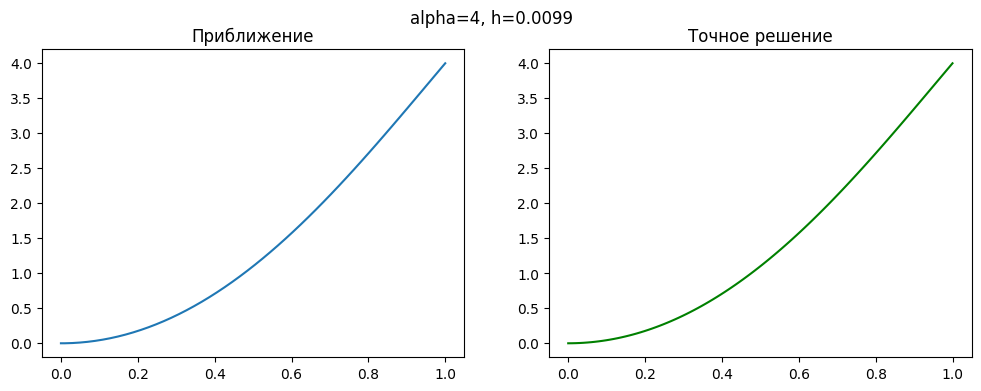

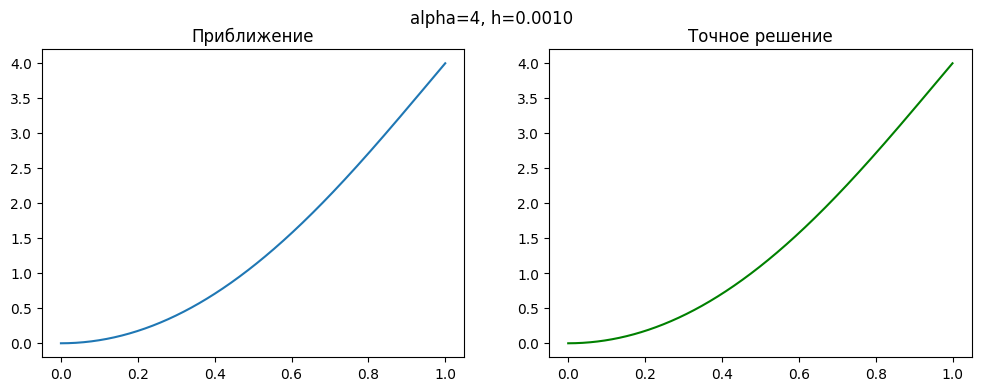

In [115]:
for alpha in range(5):
    for N in (100, 1000):
        h = 1/(N+1)
        x = np.linspace(0, 1, N+2)
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.suptitle(f"alpha={alpha}, h={h:.4f}")
        plt.plot(x, approx(N, alpha, sin_plus_cos))
        plt.title("Приближение")
        plt.subplot(1, 2, 2)
        plt.plot(x, sol4(x, alpha), color='green')
        plt.title("Точное решение")
        plt.show()